# LEAD SCORING CASE STUDY

In [248]:
#Importing the required libraries required for the analysis
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Loading and Cleaning the data

# #1.1. Import the data

In [23]:
#LOADING AND CLEANING DATA
#iMPORTING THE DATA
df = pd.read_csv('Leads.csv')
df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [ ]:
#Hence we are able to see 9240 rows and 37 columns in the dataset.

## 1.2. Fetching information of the data

In [24]:
#Understanding Data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
#To highlight the headings
df.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,...,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,...,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [6]:
#To find the number of rows and columns
df.shape

(9240, 37)

In [7]:
#To find the numerical quantities of the data available
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## 1.3. Cleaning The Dataframe

In [8]:
#Cleaning the dataframe
#Converting to lower case and replace the na with 'select'
df = df.applymap(lambda s:s.lower() if type(s) == str else s)
df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.00,...,no,select,select,02.medium,02.medium,15.0,15.0,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.50,...,no,select,select,02.medium,02.medium,15.0,15.0,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,...,no,potential lead,mumbai,02.medium,01.high,14.0,20.0,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.00,...,no,select,mumbai,02.medium,01.high,13.0,17.0,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.00,...,no,select,mumbai,02.medium,01.high,15.0,18.0,no,no,modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,landing page submission,direct traffic,yes,no,1,8.0,1845,2.67,...,no,potential lead,mumbai,02.medium,01.high,15.0,17.0,no,no,email marked spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,landing page submission,direct traffic,no,no,0,2.0,238,2.00,...,no,potential lead,mumbai,02.medium,01.high,14.0,19.0,no,yes,sms sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,landing page submission,direct traffic,yes,no,0,2.0,199,2.00,...,no,potential lead,mumbai,02.medium,01.high,13.0,20.0,no,yes,sms sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,landing page submission,google,no,no,1,3.0,499,3.00,...,no,NaN,other metro cities,02.medium,02.medium,15.0,16.0,no,no,sms sent


In [9]:
df = df.replace('select',np.nan)
df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.00,...,no,NaN,NaN,02.medium,02.medium,15.0,15.0,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.50,...,no,NaN,NaN,02.medium,02.medium,15.0,15.0,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,...,no,potential lead,mumbai,02.medium,01.high,14.0,20.0,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.00,...,no,NaN,mumbai,02.medium,01.high,13.0,17.0,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.00,...,no,NaN,mumbai,02.medium,01.high,15.0,18.0,no,no,modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,landing page submission,direct traffic,yes,no,1,8.0,1845,2.67,...,no,potential lead,mumbai,02.medium,01.high,15.0,17.0,no,no,email marked spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,landing page submission,direct traffic,no,no,0,2.0,238,2.00,...,no,potential lead,mumbai,02.medium,01.high,14.0,19.0,no,yes,sms sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,landing page submission,direct traffic,yes,no,0,2.0,199,2.00,...,no,potential lead,mumbai,02.medium,01.high,13.0,20.0,no,yes,sms sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,landing page submission,google,no,no,1,3.0,499,3.00,...,no,NaN,other metro cities,02.medium,02.medium,15.0,16.0,no,no,sms sent


In [10]:
#Checking if there are columns with unique values , it gives the count of  unique values in each column
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [11]:
#dropping columns with unique value one, because they are irrelevant to our analysis
df1 = df.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1)
df1
#Axis =1 specifies that the operation should be performed on columns and arguments are based on their unique value              

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.00,...,interested in other courses,low in relevance,NaN,NaN,02.medium,02.medium,15.0,15.0,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.50,...,ringing,NaN,NaN,NaN,02.medium,02.medium,15.0,15.0,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,...,will revert after reading the email,might be,potential lead,mumbai,02.medium,01.high,14.0,20.0,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.00,...,ringing,not sure,NaN,mumbai,02.medium,01.high,13.0,17.0,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.00,...,will revert after reading the email,might be,NaN,mumbai,02.medium,01.high,15.0,18.0,no,modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,landing page submission,direct traffic,yes,no,1,8.0,1845,2.67,...,will revert after reading the email,high in relevance,potential lead,mumbai,02.medium,01.high,15.0,17.0,no,email marked spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,landing page submission,direct traffic,no,no,0,2.0,238,2.00,...,wrong number given,might be,potential lead,mumbai,02.medium,01.high,14.0,19.0,yes,sms sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,landing page submission,direct traffic,yes,no,0,2.0,199,2.00,...,invalid number,not sure,potential lead,mumbai,02.medium,01.high,13.0,20.0,yes,sms sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,landing page submission,google,no,no,1,3.0,499,3.00,...,NaN,NaN,NaN,other metro cities,02.medium,02.medium,15.0,16.0,no,sms sent


In [12]:
#To find the percentage of missing values
round(100*(df1.isnull().sum()/len(df1.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [13]:
#Removing the columns with null values more than 40%, also removing those are not relevant for the analysis and not removing those mandatory columns that are required
df2 = df1.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Tags','Lead Profile','Lead Quality','How did you hear about X Education','City','Lead Number'], axis=1)
df2.head(10)

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,api,organic search,no,no,0,5.0,674,2.5,email opened,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,api,olark chat,no,no,0,0.0,0,0.0,olark chat conversation,...,NaN,NaN,no,no,no,no,no,no,no,modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,landing page submission,google,no,no,1,2.0,1640,2.0,email opened,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,api,olark chat,no,no,0,0.0,0,0.0,olark chat conversation,...,NaN,NaN,no,no,no,no,no,no,no,modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,landing page submission,direct traffic,no,no,0,2.0,71,2.0,email opened,...,NaN,NaN,no,no,no,no,no,no,yes,email opened
9,af465dfc-7204-4130-9e05-33231863c4b5,api,google,no,no,0,4.0,58,4.0,email opened,...,NaN,NaN,no,no,no,no,no,no,no,email opened


In [14]:
#Verfying the missing values' percentage again
round(100*(df2.isnull().sum()/len(df2.index)), 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [15]:
#We are not ignoring the few columns though they have higheer amount of null values but are important for analysis. Hence we are changing those rows are not mentioned for our eaasy analysis.
df2['Specialization'] = df2['Specialization'].fillna('not mentioned') 
df2['What matters most to you in choosing a course'] = df2['What matters most to you in choosing a course'].fillna('not mentioned')
df2['Country'] = df2['Country'].fillna('not mentioned')
df2['What is your current occupation'] = df2['What is your current occupation'].fillna('not mentioned')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [21]:
#Again we will check the percentage of null values in updated data frame so as to see if our logic worked
round(100*(df2.isnull().sum()/len(df2.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [20]:
# We will check the country counts, so as to find the customers from all the countries.
df2["Country"].value_counts()

Country
india                   6492
not mentioned           2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switze

In [25]:
## We are categorizing the countries as those are in India and those are outside i.e. foreign countries.
def slots(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "foreign countries"
    return category

df2['Country'] = df2.apply(lambda x:slots(x['Country']), axis = 1)
df2['Country'].value_counts()

Country
india                6492
foreign countries    2748
Name: count, dtype: int64

In [26]:
# checking the percentage of missing values aggain 
round(100*(df2.isnull().sum()/len(df2.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [27]:
#The percentage of loss due to  null values removal is calculated
round(100*(sum(df2.isnull().sum(axis=1) > 1)/df2.shape[0]),2)


1.48

In [28]:
df3 = df2[df2.isnull().sum(axis=1) <1]

In [29]:
# Code for checking number of rows left in percent
round(100*(df3.shape[0])/(df.shape[0]),2)


98.2

In [30]:
round(100*(df3.isnull().sum()/len(df3.index)), 2)

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [31]:
# To recognize  all the categorical values
for column in df3:
    print(df3[column].astype('category').value_counts())
    print('----------------------------------------------------------------------------------------')

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
aa9b208a-31f7-456f-8968-beee2b2ab2c7    1
aa708f29-9cb7-4959-a251-8aff9613b024    1
aa7e4871-e2f5-4c6a-887a-040c3a7b80bb    1
aa7f5fc5-f49a-44a7-b870-e7abfbd0fe76    1
                                       ..
537963c8-22d9-459d-8aae-ddac40580ffb    1
53744d5a-0483-42c0-80b0-8990a4d2356d    1
53715ab1-2106-4c4e-8493-81cc465eb9ce    1
536cdc6b-f4c1-449d-bfd8-9ef0ac912dbb    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9074, dtype: int64
----------------------------------------------------------------------------------------
Lead Origin
landing page submission    4885
api                        3578
lead add form               581
lead import                  30
Name: count, dtype: int64
----------------------------------------------------------------------------------------
Lead Source
google               2873
direct traffic       2543
olark chat           1753
organic search       1154
reference             443


In [57]:
# Removing Id values since they are unique for everyone
df_final = df3.drop('Prospect ID',axis = 1)
df_final.shape

(9074, 21)

# 2. Exploratory Data Analysis



## 2.1. Univariate Analysis

### 2.1.1 Categorical Variables

In [58]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 non-n

In [65]:
print(df_final['Lead Origin'].dtype)

object


In [66]:
print(df_final['Lead Origin'].unique())

['api' 'landing page submission' 'lead add form' 'lead import']


In [69]:
df_final['Lead Origin'] = df_final['Lead Origin'].astype('category')

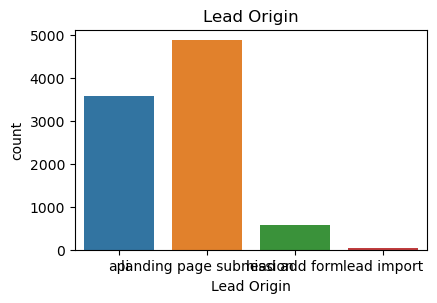

In [249]:
plt.figure(figsize=(10, 20))

plt.subplot(6, 2, 1)
sns.countplot(x='Lead Origin', data=df_final)
plt.title('Lead Origin')

plt.show()

category
['no', 'yes']
Categories (2, object): ['no', 'yes']


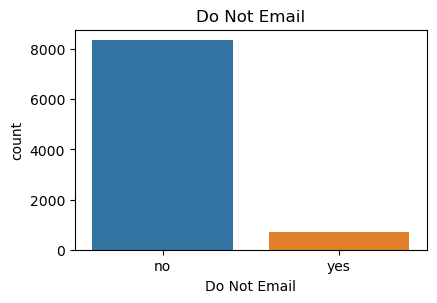

In [83]:
print(df_final['Do Not Email'].dtype)
print(df_final['Do Not Email'].unique())
df_final['Do Not Email'] = df_final['Do Not Email'].astype('category')
plt.figure(figsize=(10, 20))

plt.subplot(6, 2, 2)
sns.countplot(x='Do Not Email', data=df_final)
plt.title('Do Not Email')

plt.show()

category
['no', 'yes']
Categories (2, object): ['no', 'yes']


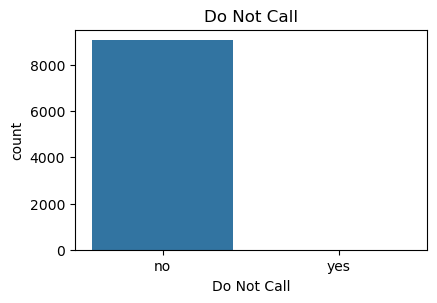

In [84]:
print(df_final['Do Not Call'].dtype)
print(df_final['Do Not Call'].unique())
df_final['Do Not Call'] = df_final['Do Not Call'].astype('category')
plt.figure(figsize=(10, 20))

plt.subplot(6, 2, 3)
sns.countplot(x='Do Not Call', data=df_final)
plt.title('Do Not Call')

plt.show()

category
['foreign countries', 'india']
Categories (2, object): ['foreign countries', 'india']


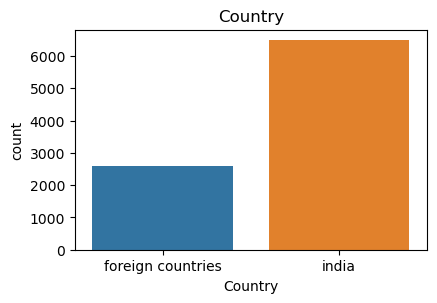

In [85]:
print(df_final['Country'].dtype)
print(df_final['Country'].unique())
df_final['Country'] = df_final['Country'].astype('category')
plt.figure(figsize=(10, 20))

plt.subplot(6, 2, 4)
sns.countplot(x='Country', data=df_final)
plt.title('Country')

plt.show()

category
['no', 'yes']
Categories (2, object): ['no', 'yes']


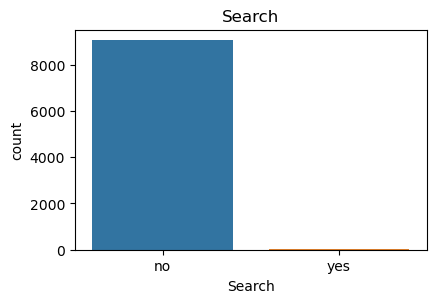

In [86]:
print(df_final['Search'].dtype)
print(df_final['Search'].unique())
df_final['Search'] = df_final['Search'].astype('category')
plt.figure(figsize=(10, 20))
plt.subplot(6, 2, 5)
sns.countplot(x='Search', data=df_final)
plt.title('Search')

plt.show()



category
['no', 'yes']
Categories (2, object): ['no', 'yes']


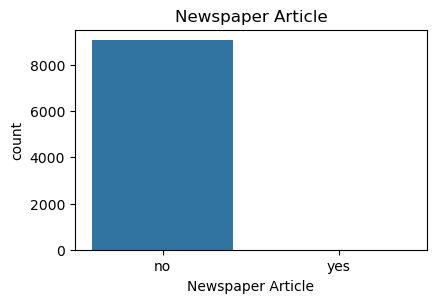

In [88]:
print(df_final['Newspaper Article'].dtype)
print(df_final['Newspaper Article'].unique())
df_final['Newspaper Article'] = df_final['Newspaper Article'].astype('category')
plt.figure(figsize=(10, 20))
plt.subplot(6, 2, 6)
sns.countplot(x='Newspaper Article', data=df_final)
plt.title('Newspaper Article')
plt.show()

category
['no', 'yes']
Categories (2, object): ['no', 'yes']


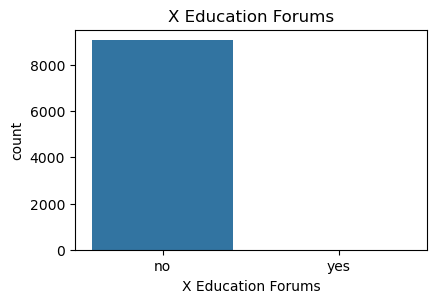

In [89]:
print(df_final['X Education Forums'].dtype)
print(df_final['X Education Forums'].unique())
df_final['X Education Forums'] = df_final['X Education Forums'].astype('category')
plt.figure(figsize=(10, 20))
plt.subplot(6, 2, 7)
sns.countplot(x='X Education Forums', data=df_final)
plt.title('X Education Forums')
plt.show()



category
['no', 'yes']
Categories (2, object): ['no', 'yes']


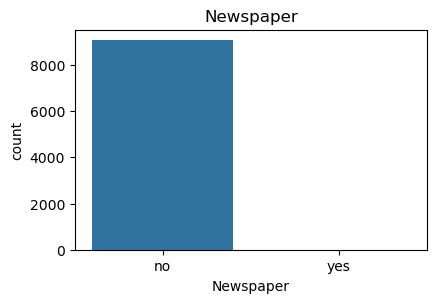

In [90]:
print(df_final['Newspaper'].dtype)
print(df_final['Newspaper'].unique())
df_final['Newspaper'] = df_final['Newspaper'].astype('category')
plt.figure(figsize=(10, 20))
plt.subplot(6, 2, 8)
sns.countplot(x='Newspaper', data=df_final)
plt.title('Newspaper')
plt.show()


category
['no', 'yes']
Categories (2, object): ['no', 'yes']


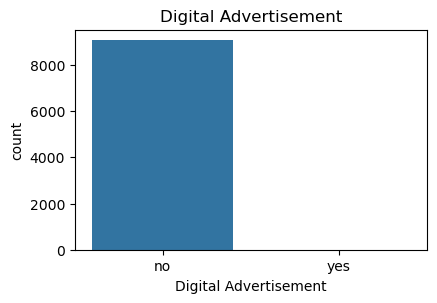

In [91]:
print(df_final['Digital Advertisement'].dtype)
print(df_final['Digital Advertisement'].unique())
df_final['Digital Advertisement'] = df_final['Digital Advertisement'].astype('category')
plt.figure(figsize=(10, 20))
plt.subplot(6, 2, 9)
sns.countplot(x='Digital Advertisement', data=df_final)
plt.title('Digital Advertisement')
plt.show()

category
['no', 'yes']
Categories (2, object): ['no', 'yes']


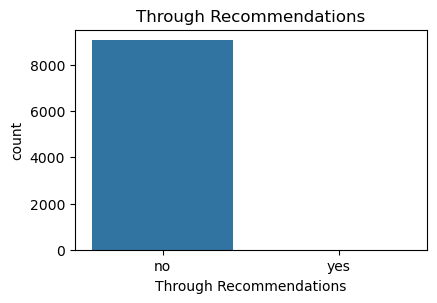

In [123]:
print(df_final['Through Recommendations'].dtype)
print(df_final['Through Recommendations'].unique())
df_final['Through Recommendations'] = df_final['Through Recommendations'].astype('category')
plt.figure(figsize=(10, 20))
plt.subplot(6, 2, 10)
sns.countplot(x='Through Recommendations', data=df_final)
plt.title('Through Recommendations')
plt.show()



category
['no', 'yes']
Categories (2, object): ['no', 'yes']


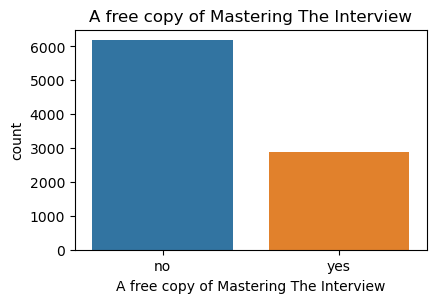

In [93]:
print(df_final['A free copy of Mastering The Interview'].dtype)
print(df_final['A free copy of Mastering The Interview'].unique())
df_final['A free copy of Mastering The Interview'] = df_final['A free copy of Mastering The Interview'].astype('category')
plt.figure(figsize=(10, 20))
plt.subplot(6, 2, 11)
sns.countplot(x='A free copy of Mastering The Interview', data=df_final)
plt.title('A free copy of Mastering The Interview')
plt.show()



category
['modified', 'email opened', 'page visited on website', 'email bounced', 'email link clicked', ..., 'resubscribed to emails', 'view in browser link clicked', 'form submitted on website', 'email received', 'email marked spam']
Length: 16
Categories (16, object): ['approached upfront', 'email bounced', 'email link clicked', 'email marked spam', ..., 'sms sent', 'unreachable', 'unsubscribed', 'view in browser link clicked']


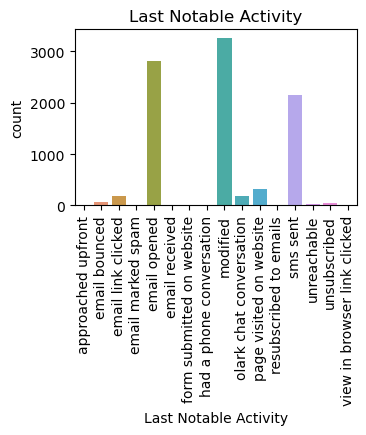

In [251]:
print(df_final['Last Notable Activity'].dtype)
print(df_final['Last Notable Activity'].unique())
df_final['Last Notable Activity'] = df_final['Last Notable Activity'].astype('category')
plt.figure(figsize=(8, 16))
plt.subplot(6, 2, 12)
sns.countplot(x='Last Notable Activity', data=df_final)
plt.title('Last Notable Activity')
plt.xticks(rotation=90)
plt.show()

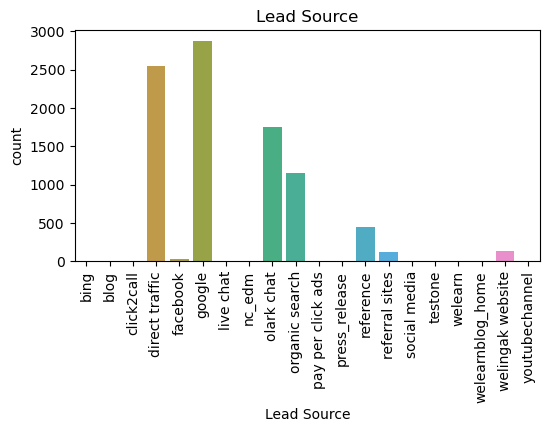

In [258]:
df_final['Lead Source'] = df_final['Lead Source'].astype('category')

plt.figure(figsize=(6, 3))
sns.countplot(x='Lead Source', data=df_final).tick_params(axis='x', rotation=90)
plt.title('Lead Source')
plt.show()

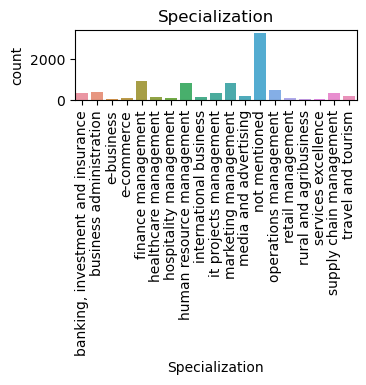

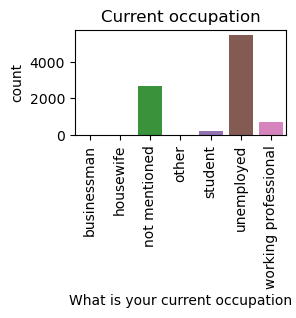

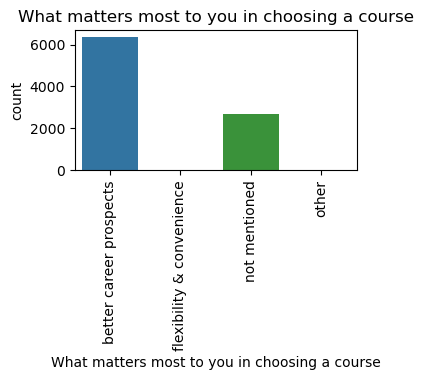

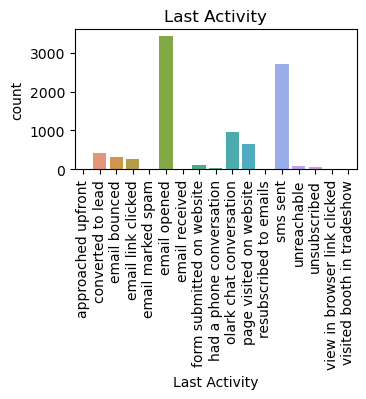

In [277]:
import seaborn as sns
import matplotlib.pyplot as plt
df_final['Specialization'] = df_final['Specialization'].astype('category')
plt.figure(figsize=(8, 2))
plt.subplot(2, 2, 1)
sns.countplot(x='Specialization', data=df_final).tick_params(axis='x', rotation=90)
plt.title('Specialization')

df_final['What is your current occupation'] = df_final['What is your current occupation'].astype('category')
plt.figure(figsize=(6, 3))
plt.subplot(2, 2, 2)
sns.countplot(x='What is your current occupation', data=df_final).tick_params(axis='x', rotation=90)
plt.title('Current occupation')


df_final['What matters most to you in choosing a course'] = df_final['What matters most to you in choosing a course'].astype('category')
plt.figure(figsize=(8, 4))
plt.subplot(2, 2, 3)
sns.countplot(x='What matters most to you in choosing a course', data=df_final).tick_params(axis='x', rotation=90)
plt.title('What matters most to you in choosing a course')

df_final['Last Activity'] = df_final['Last Activity'].astype('category')
plt.figure(figsize=(8, 4))
plt.subplot(2,2,4)
sns.countplot(x ='Last Activity', data=df_final).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

In [282]:
print(df.dtypes)

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [283]:
print(df['Converted'].isnull().sum())


0


In [284]:
print(df['Converted'].unique())

[0 1]


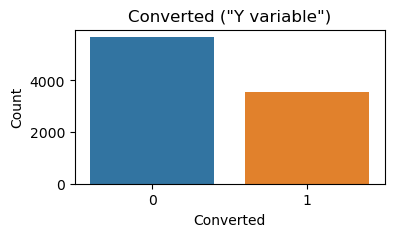

In [286]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 2))
sns.countplot(x='Converted', data=df)
plt.title('Converted ("Y variable")')
plt.xlabel('Converted')
plt.ylabel('Count')
plt.show()


## 2.1.2. Numerical Variables

In [287]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Lead Origin                                    9074 non-null   category
 1   Lead Source                                    9074 non-null   category
 2   Do Not Email                                   9074 non-null   category
 3   Do Not Call                                    9074 non-null   category
 4   Converted                                      9074 non-null   int64   
 5   TotalVisits                                    9074 non-null   float64 
 6   Total Time Spent on Website                    9074 non-null   int64   
 7   Page Views Per Visit                           9074 non-null   float64 
 8   Last Activity                                  9074 non-null   category
 9   Country                                       

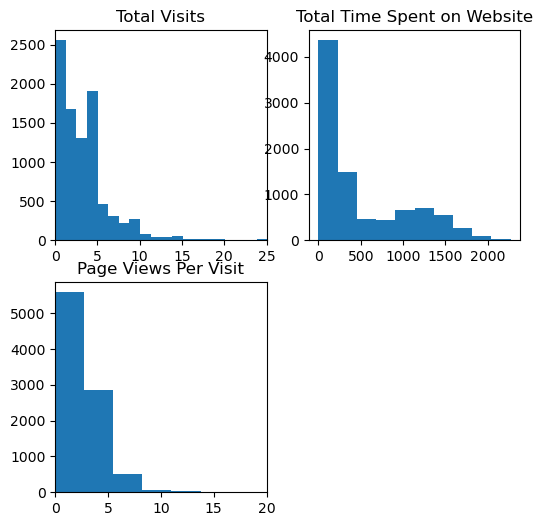

In [292]:
plt.figure(figsize = (6,6))
plt.subplot(221)
plt.hist(df_final['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(df_final['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(df_final['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

## 2.2. Relating all the categorical variables to Converted

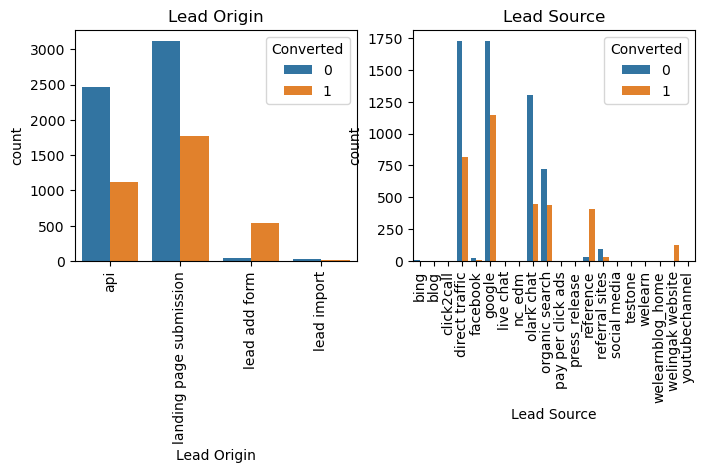

In [309]:
plt.figure(figsize = (8,3))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

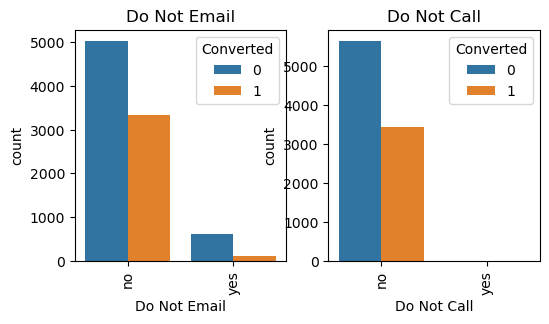

In [310]:
plt.figure(figsize = (6,3))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()


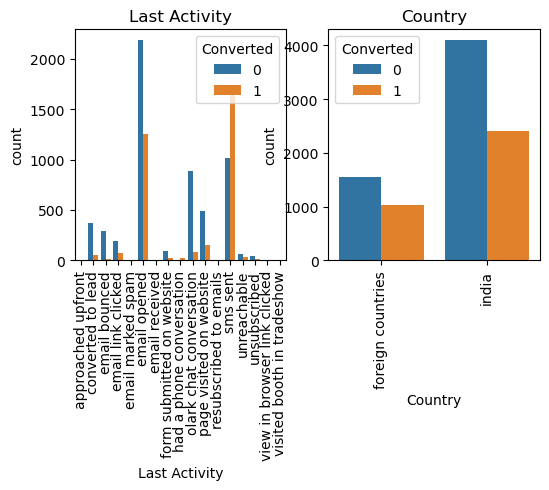

In [311]:
plt.figure(figsize = (6,3))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

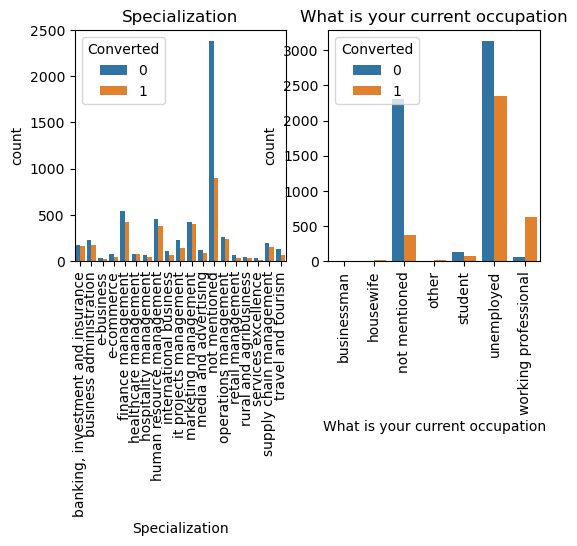

In [312]:
plt.figure(figsize = (6,3))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

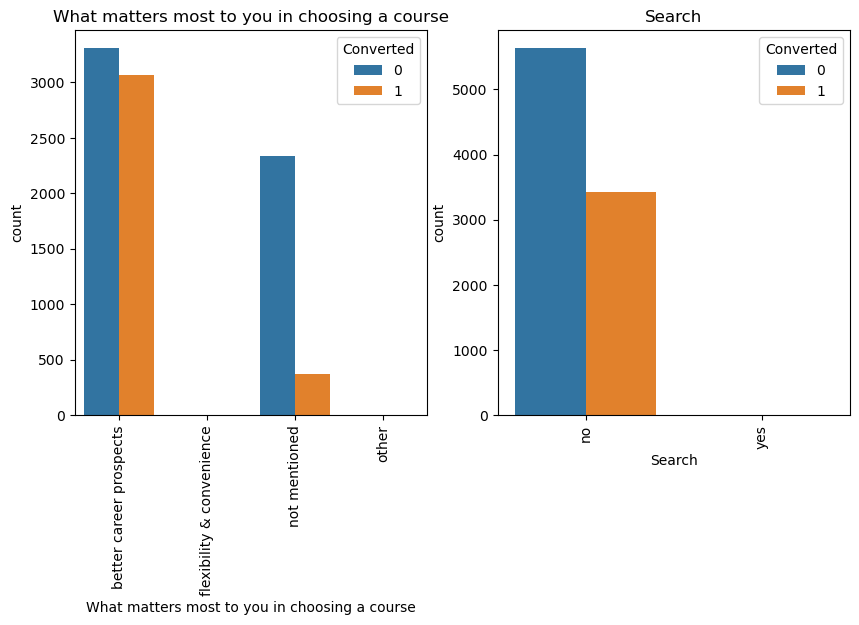

In [301]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()


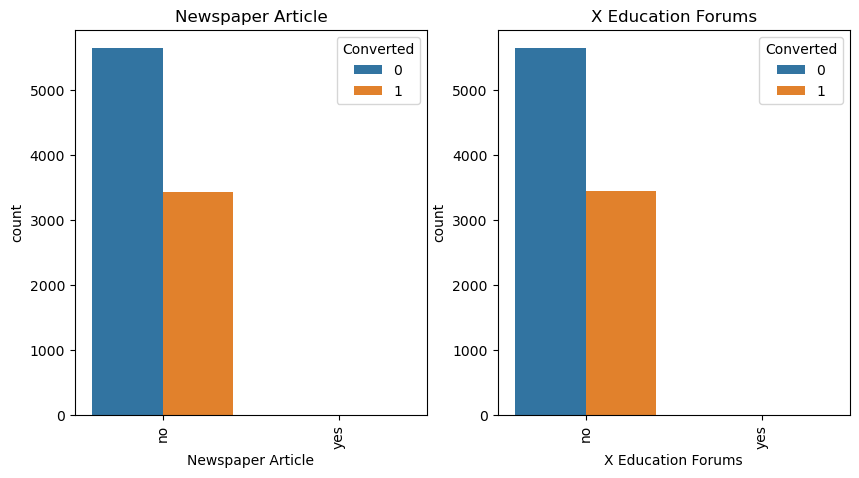

In [302]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

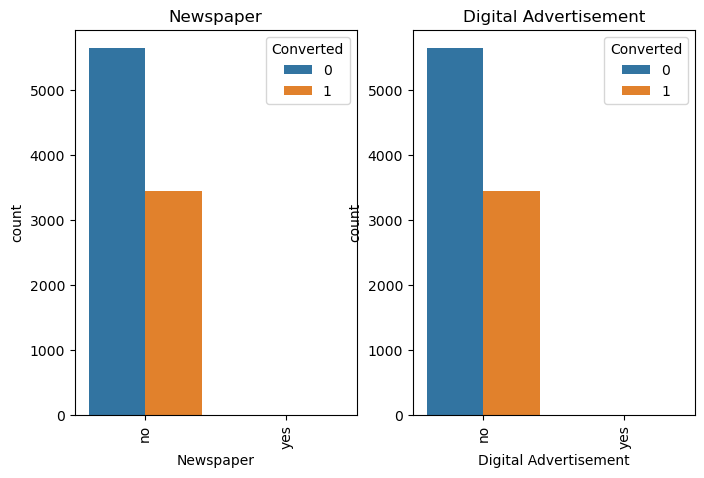

In [303]:
plt.figure(figsize = (8,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()


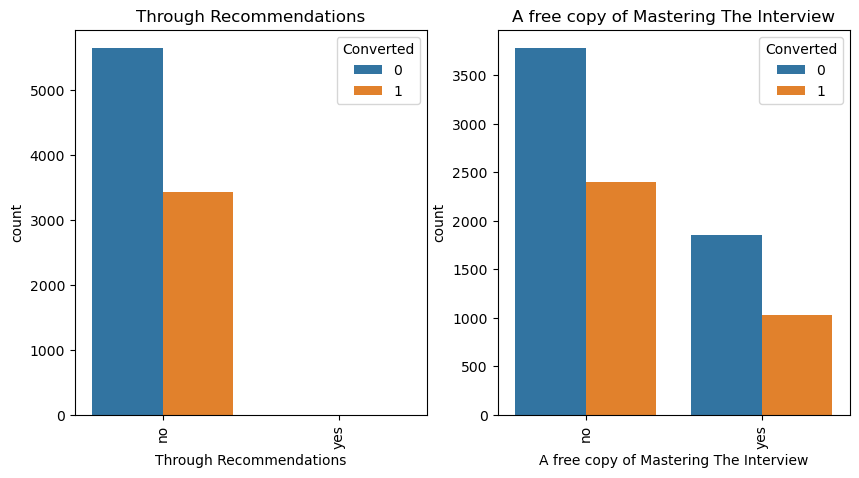

In [304]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

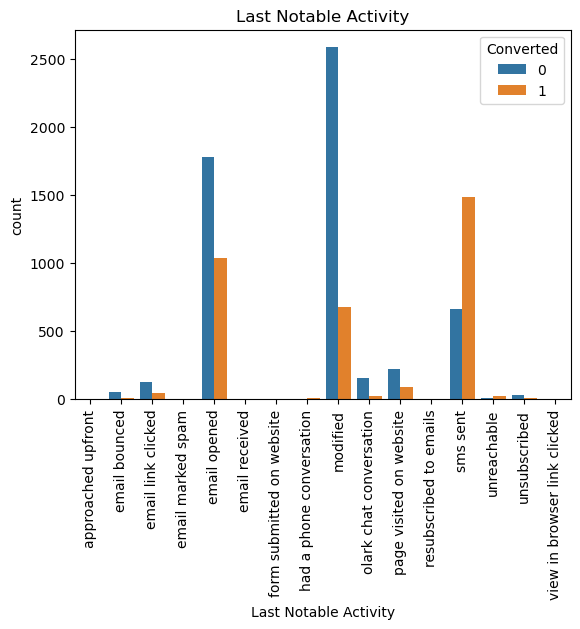

In [305]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

In [307]:
# Filter out non-numeric columns
numeric_df = df_final.select_dtypes(include=['number'])

# Check if the numeric_df contains only numeric columns
print(numeric_df.dtypes)


Converted                        int64
TotalVisits                    float64
Total Time Spent on Website      int64
Page Views Per Visit           float64
dtype: object


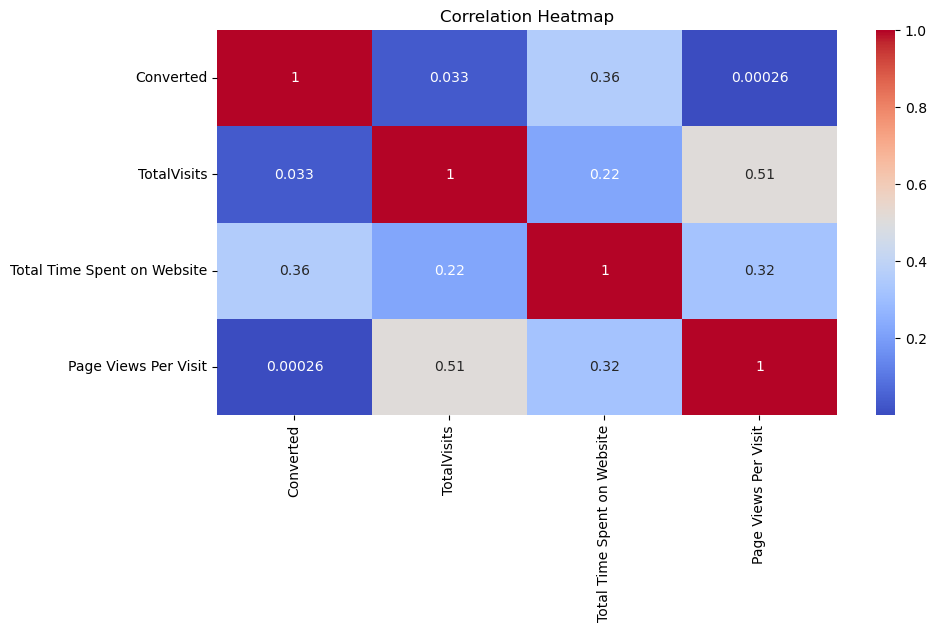

In [308]:
plt.figure(figsize=(10, 5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [102]:
#Finding out the mean , median , Std percentiles.
numeric = df_final[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


# 3. DUMMY Variables

In [124]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Lead Origin                                    9074 non-null   category
 1   Lead Source                                    9074 non-null   object  
 2   Do Not Email                                   9074 non-null   category
 3   Do Not Call                                    9074 non-null   category
 4   Converted                                      9074 non-null   int64   
 5   TotalVisits                                    9074 non-null   float64 
 6   Total Time Spent on Website                    9074 non-null   int64   
 7   Page Views Per Visit                           9074 non-null   float64 
 8   Last Activity                                  9074 non-null   object  
 9   Country                                       

In [125]:
df_final.loc[:, df_final.dtypes == 'object'].columns

Index(['Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course'],
      dtype='object')

In [128]:
# Create dummy variables using the 'get_dummies' to convert categorical data into numerical data
dummy = pd.get_dummies(df_final[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
df_final_dum = pd.concat([df_final, dummy], axis=1)
df_final_dum

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,no,no,0,0.0,0,0.00,page visited on website,foreign countries,...,False,False,True,False,False,False,False,False,False,False
1,api,organic search,no,no,0,5.0,674,2.50,email opened,india,...,False,False,False,False,False,False,False,False,False,False
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,email opened,india,...,False,False,False,False,False,False,False,False,False,False
3,landing page submission,direct traffic,no,no,0,1.0,305,1.00,unreachable,india,...,False,False,True,False,False,False,False,False,False,False
4,landing page submission,google,no,no,1,2.0,1428,1.00,converted to lead,india,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,landing page submission,direct traffic,yes,no,1,8.0,1845,2.67,email marked spam,foreign countries,...,False,False,False,False,False,False,False,False,False,False
9236,landing page submission,direct traffic,no,no,0,2.0,238,2.00,sms sent,india,...,False,False,False,False,False,False,True,False,False,False
9237,landing page submission,direct traffic,yes,no,0,2.0,199,2.00,sms sent,india,...,False,False,False,False,False,False,True,False,False,False
9238,landing page submission,google,no,no,1,3.0,499,3.00,sms sent,india,...,False,False,False,False,False,False,True,False,False,False


In [130]:
df_final_dum = df_final_dum.drop(['What is your current occupation_not mentioned','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization', 'Specialization_not mentioned','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], axis = 1)
df_final_dum

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.00,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,0,5.0,674,2.50,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,2.0,1532,2.00,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,1.0,305,1.00,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,1,2.0,1428,1.00,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9236,0,2.0,238,2.00,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
9237,0,2.0,199,2.00,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
9238,1,3.0,499,3.00,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


# 4. Test-Train Split

In [131]:
#We will import train-test-split library

from sklearn.model_selection import train_test_split

In [133]:
X = df_final_dum.drop(['Converted'],axis =  1)
X.head(10)

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0,0.0,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,5.0,674,2.5,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2.0,1532,2.0,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1.0,305,1.0,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,2.0,1428,1.0,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
5,0.0,0,0.0,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
6,2.0,1640,2.0,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
7,0.0,0,0.0,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
8,2.0,71,2.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,4.0,58,4.0,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [134]:
# Putting the target variable in y
y = df_final_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [135]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [136]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
1289,0.014184,0.612676,0.083333,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3604,0.000000,0.000000,0.000000,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
5584,0.042553,0.751761,0.250000,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7679,0.000000,0.000000,0.000000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7563,0.014184,0.787852,0.083333,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


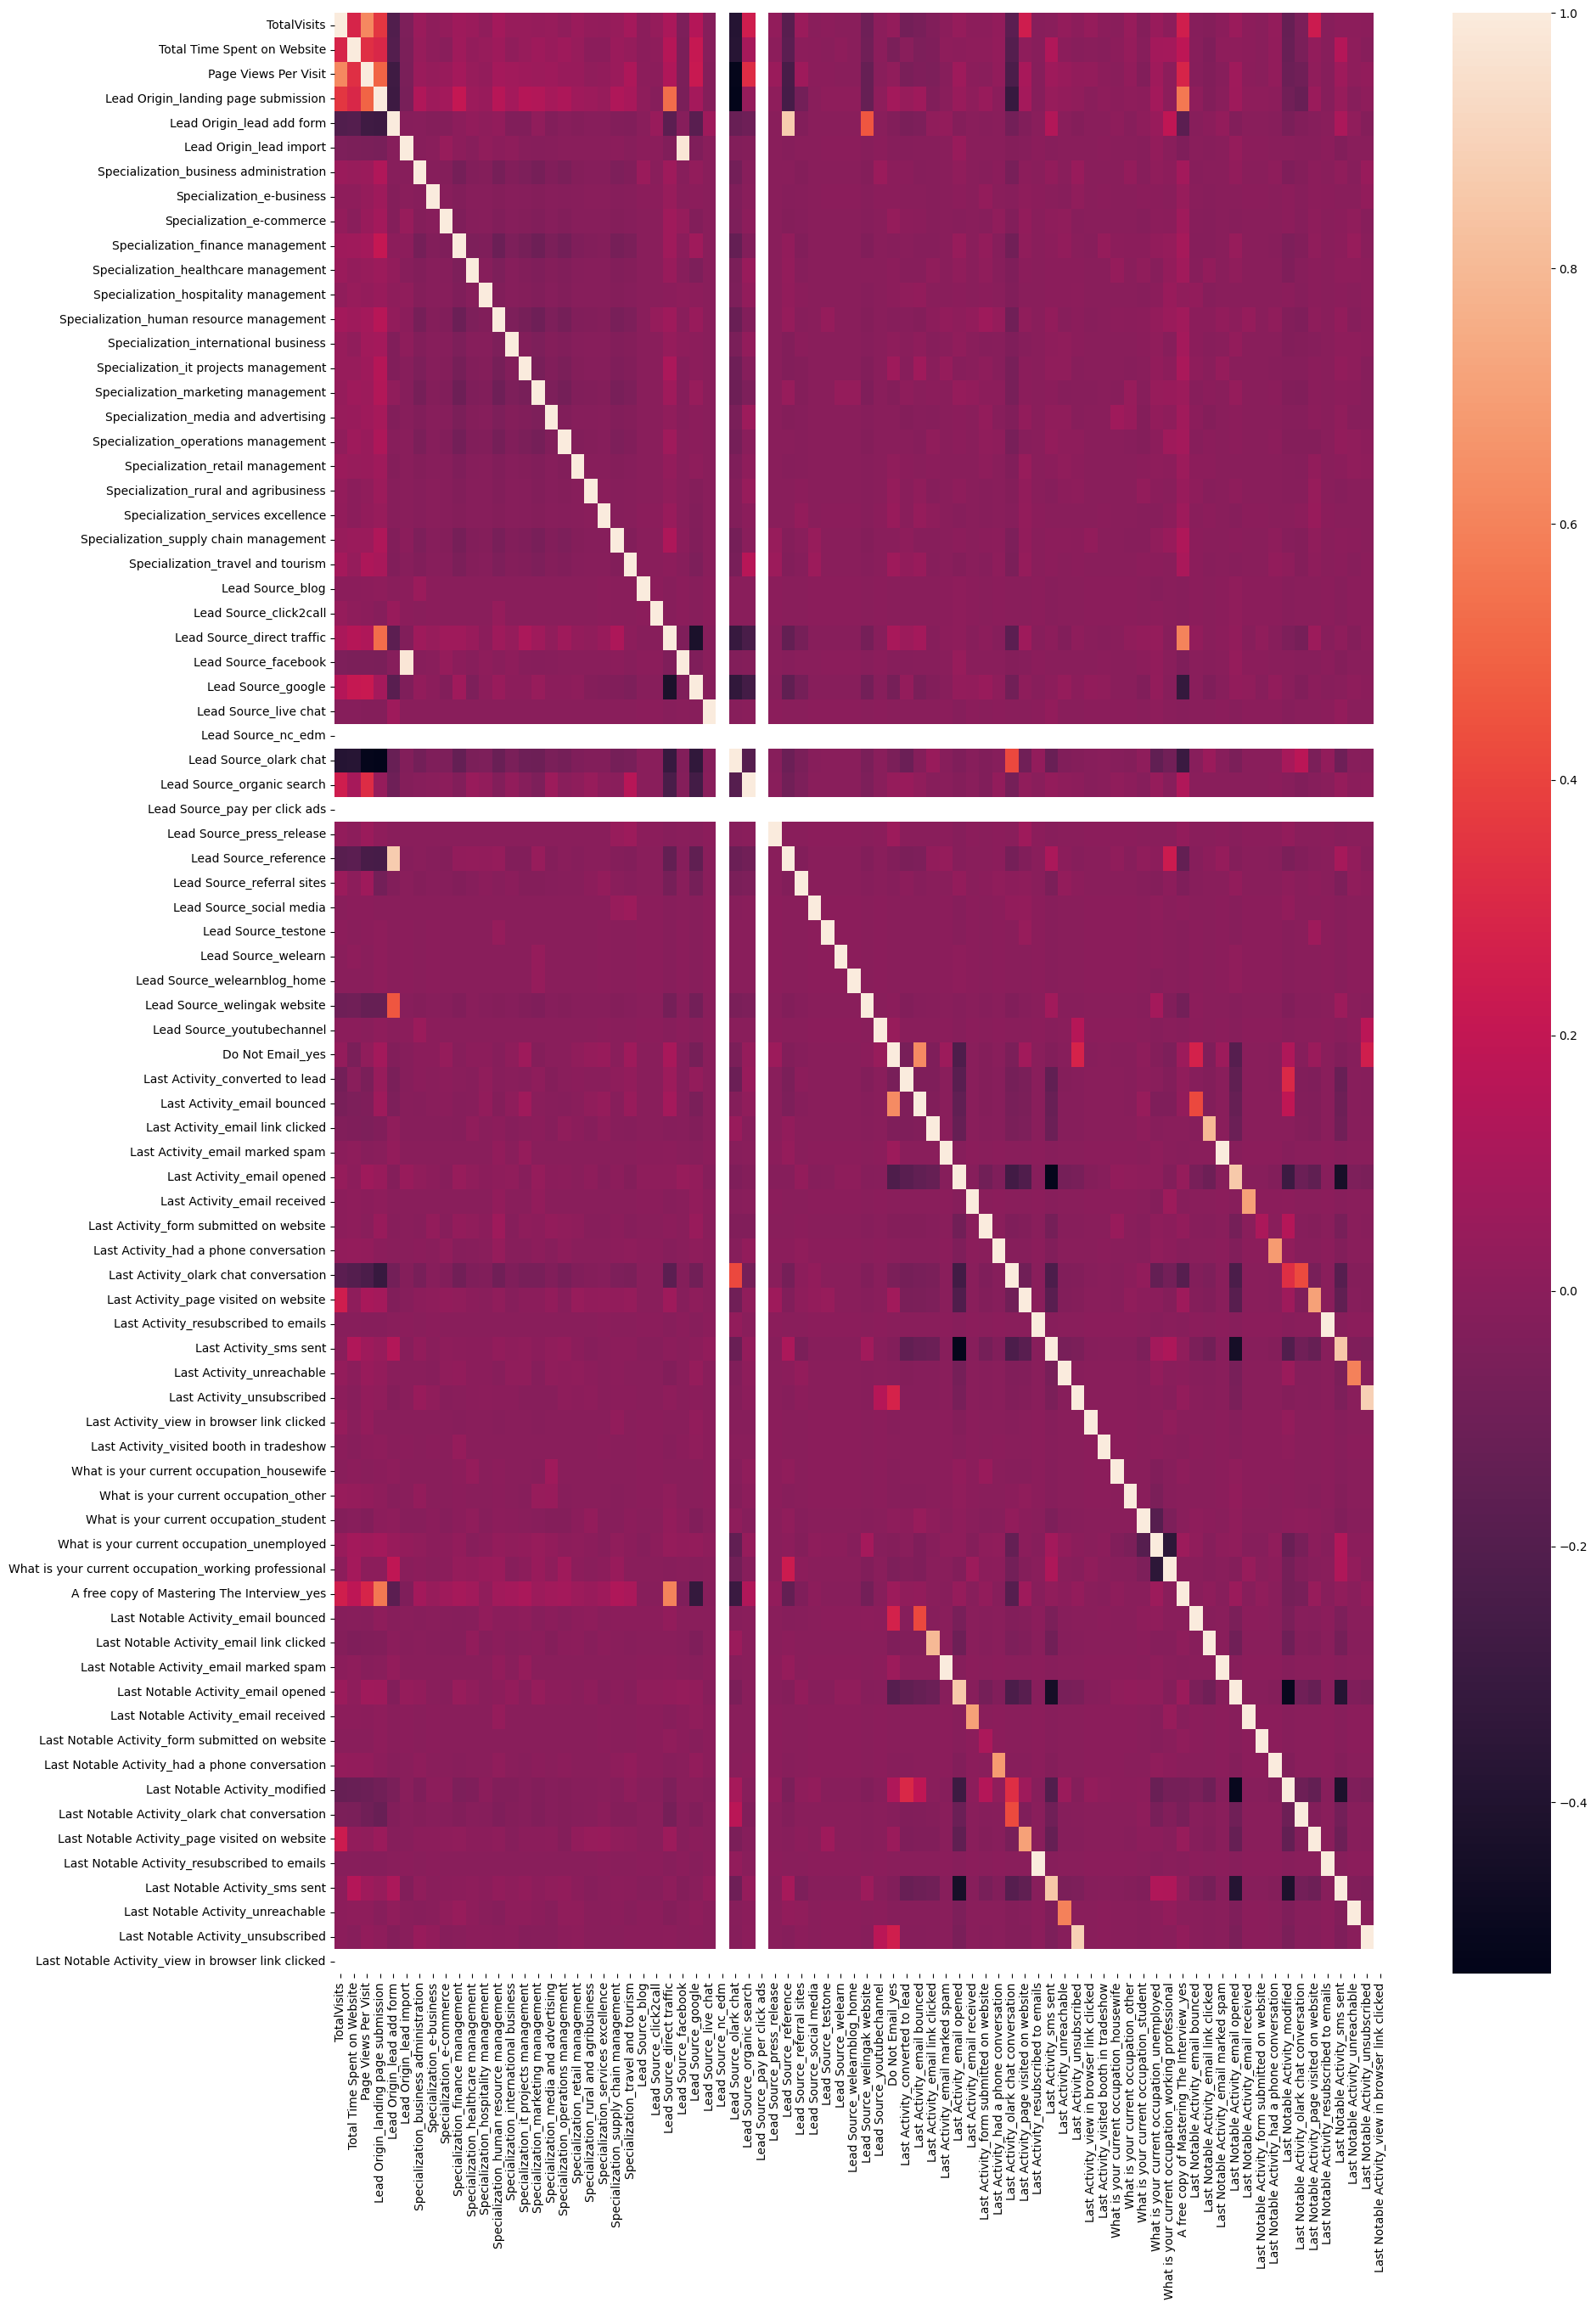

In [137]:
# To check the correlation among varibles
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

# 5. Model Building

In [138]:
# Import 'LogisticRegression'. It is generally used for classification problems when the dependent variable is binary.
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [142]:
# Import RFE i.e. recursive feature elemination. It helps in selecting the most relevant features. Thereby, improving the performance of the learning model.
from sklearn.feature_selection import RFE

In [155]:
# Running RFE with 15 variables as output
# Create an instance of LogisticRegression  
logreg = LogisticRegression(max_iter=100)
rfe = RFE(estimator=logreg, n_features_to_select=15)  
rfe = rfe.fit(X_train, y_train)


E:\ANACONDA\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\ANACONDA\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

In [154]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Lead Origin_landing page submission', False, 26),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 40),
 ('Specialization_business administration', False, 33),
 ('Specialization_e-business', False, 32),
 ('Specialization_e-commerce', False, 23),
 ('Specialization_finance management', False, 30),
 ('Specialization_healthcare management', False, 25),
 ('Specialization_hospitality management', False, 45),
 ('Specialization_human resource management', False, 31),
 ('Specialization_international business', False, 37),
 ('Specialization_it projects management', False, 28),
 ('Specialization_marketing management', False, 22),
 ('Specialization_media and advertising', False, 42),
 ('Specialization_operations management', False, 27),
 ('Specialization_retail management', False, 63),
 ('Specialization_rural and agribusiness', False, 24),
 ('Specialization_serv

In [157]:
# Running RFE with 15 variables as output

rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

E:\ANACONDA\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\ANACONDA\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

In [158]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Lead Origin_landing page submission', False, 26),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 40),
 ('Specialization_business administration', False, 33),
 ('Specialization_e-business', False, 32),
 ('Specialization_e-commerce', False, 23),
 ('Specialization_finance management', False, 30),
 ('Specialization_healthcare management', False, 25),
 ('Specialization_hospitality management', False, 45),
 ('Specialization_human resource management', False, 31),
 ('Specialization_international business', False, 37),
 ('Specialization_it projects management', False, 28),
 ('Specialization_marketing management', False, 22),
 ('Specialization_media and advertising', False, 42),
 ('Specialization_operations management', False, 27),
 ('Specialization_retail management', False, 63),
 ('Specialization_rural and agribusiness', False, 24),
 ('Specialization_serv

In [159]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [ ]:
#All the variables selected by RFE, next statistics part (p-values and the VIFs).

In [160]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [177]:
#Importing statsmodels
import numpy as np  
import pandas as pd  
import statsmodels.api as sm  
  
# Convert pandas DataFrame to NumPy array with compatible data type  
X_train_array = np.asarray(X_train).astype(float)  
y_train_array = np.asarray(y_train).astype(float)  
  
# Add constant to the training data  
X_train_sm = sm.add_constant(X_train_array)  
  
# Create GLM model  
logm1 = sm.GLM(y_train_array, X_train_sm, family=sm.families.Binomial())  
  
# Fit the model  
res = logm1.fit()  
  
# Print the summary
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2635.0
Date:                Sun, 30 Jun 2024   Deviance:                       5270.1
Time:                        20:59:02   Pearson chi2:                 6.48e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3963
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4876      0.114    -30.661      0.0

In [178]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [181]:
import pandas as pd  
from statsmodels.stats.outliers_influence import variance_inflation_factor  
  
# Create an empty dataframe  
vif = pd.DataFrame()  
  
# Convert the input data to a compatible data type  
X_train_numeric = X_train.astype(float)  
  
# Add the features and their corresponding VIF values to the dataframe  
vif['Features'] = X_train_numeric.columns  
vif['VIF'] = [variance_inflation_factor(X_train_numeric.values, i) for i in range(X_train_numeric.shape[1])]  
  
# Round the VIF values to two decimal places  
vif['VIF'] = round(vif['VIF'], 2)  
  
# Sort the dataframe by VIF in descending order  
vif = vif.sort_values(by="VIF", ascending=False)  
  
# Print the VIF dataframe  
print(vif)

                                             Features   VIF
11         What is your current occupation_unemployed  2.30
1                         Total Time Spent on Website  2.07
0                                         TotalVisits  1.85
2                           Lead Origin_lead add form  1.59
7                              Last Activity_sms sent  1.54
3                              Lead Source_olark chat  1.51
6               Last Activity_olark chat conversation  1.37
12  What is your current occupation_working profes...  1.32
4                        Lead Source_welingak website  1.31
5                                    Do Not Email_yes  1.06
10            What is your current occupation_student  1.05
9               What is your current occupation_other  1.01
14                  Last Notable Activity_unreachable  1.01
8           What is your current occupation_housewife  1.00
13     Last Notable Activity_had a phone conversation  1.00


In [186]:
 #Removing 'Last Notable Activity had a phone conversation' as p value doesn't seem good
X_train_numeric.drop('Last Notable Activity_had a phone conversation', axis =  1, inplace = True)

In [188]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train_numeric)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2642.8
Date:                Sun, 30 Jun 2024   Deviance:                       5285.6
Time:                        21:29:37   Pearson chi2:                 6.48e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3948
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4831      0.114    -30.629      0.000      -3.706      -3.260
TotalVisits                                              5.6046      1.450      3.866      0.000       2.763       8.446
Total Time Spent on Website                              4.6104      0.167     27.675      0.000       4.284       4.937
Lead Origin_lead add form                                3.7375      0.225     16.591      0.000       3.296       4.179
Lead Source_olark chat                                   1.5910      0.112     14.249      0.000       1.372       1.810
Lead Source_welingak website                             2.5984      1.033      2.516      0.012       0.574       4.623
Do Not Email_yes                                        -1.4324      0.170     -8.409      0.000      -1.766      -1.099
Last Activity_olark chat conversation                   -1.3919      0.168     -8.310      0.000      -1.720      -1.064
Last Activity_sms sent                                   1.2754      0.074     17.245      0.000       1.130       1.420
What is your current occupation_housewife               23.4021   1.14e+04      0.002      0.998   -2.23e+04    2.23e+04
What is your current occupation_other                    2.1799      0.755      2.887      0.004       0.700       3.660
What is your current occupation_student                  1.2690      0.227      5.600      0.000       0.825       1.713
What is your current occupation_unemployed               1.1852      0.086     13.753      0.000       1.016       1.354
What is your current occupation_working professional     3.7035      0.205     18.099      0.000       3.302       4.105
Last Notable Activity_unreachable                        1.8251      0.601      3.036      0.002       0.647       3.003
========================================================================================================================
"""

In [189]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()  
  
# Convert the input data to a compatible data type  
X_train_numeric = X_train.astype(float)  
  
# Add the features and their corresponding VIF values to the dataframe  
vif['Features'] = X_train_numeric.columns  
vif['VIF'] = [variance_inflation_factor(X_train_numeric.values, i) for i in range(X_train_numeric.shape[1])]  
  
# Round the VIF values to two decimal places  
vif['VIF'] = round(vif['VIF'], 2)  
  
# Sort the dataframe by VIF in descending order  
vif = vif.sort_values(by="VIF", ascending=False)  
  
# Print the VIF dataframe  
print(vif)

                                             Features   VIF
11         What is your current occupation_unemployed  2.30
1                         Total Time Spent on Website  2.06
0                                         TotalVisits  1.85
2                           Lead Origin_lead add form  1.59
7                              Last Activity_sms sent  1.54
3                              Lead Source_olark chat  1.51
6               Last Activity_olark chat conversation  1.37
12  What is your current occupation_working profes...  1.32
4                        Lead Source_welingak website  1.31
5                                    Do Not Email_yes  1.06
10            What is your current occupation_student  1.05
9               What is your current occupation_other  1.01
13                  Last Notable Activity_unreachable  1.01
8           What is your current occupation_housewife  1.00


In [192]:
#Removing "what is your current occupation_housewife " is removed as p value doesn't fit
X_train_numeric.drop('What is your current occupation_housewife', axis = 1, inplace = True)

In [194]:
X_train_array = np.asarray(X_train).astype(float)  
y_train_array = np.asarray(y_train).astype(float)  
  
# Add constant to the training data  
X_train_sm = sm.add_constant(X_train_numeric)  
  
# Create GLM model  
logm3 = sm.GLM(y_train_array, X_train_sm, family=sm.families.Binomial())  
  
# Fit the model  
res = logm3.fit()  
  
# Print the summary
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2651.3
Date:                Sun, 30 Jun 2024   Deviance:                       5302.6
Time:                        21:39:40   Pearson chi2:                 6.50e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3932
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [ ]:
# all the p values are less than 0.05, hence we can fix the model.


# 6. Creating The Prediction

In [195]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1289    0.647883
3604    0.133180
5584    0.232946
7679    0.133180
7563    0.495090
7978    0.777765
7780    0.167311
7863    0.982741
838     0.772980
708     0.149249
dtype: float64

In [196]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.64788325, 0.13318019, 0.23294642, 0.13318019, 0.49508996,
       0.77776483, 0.16731088, 0.98274125, 0.77298038, 0.1492489 ])

In [197]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.647883
1,0,0.133180
2,0,0.232946
3,0,0.133180
4,0,0.495090


In [198]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.647883,1
1,0,0.133180,0
2,0,0.232946,0
3,0,0.133180,0
4,0,0.495090,0


# 7. Model Evaluation

In [199]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [200]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3437,  458],
       [ 747, 1709]], dtype=int64)

In [ ]:
# Predicted     not_churn    churn
# Actual
# not_churn        3403       492
# churn             729      1727

In [201]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.810266099826799

In [ ]:
#Thus, we found out that we got around 81.2% accuracy. Hence, We acnowledge the model

In [203]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]
# Calculating the sensitivity
TP/(TP+FN)

0.6958469055374593

In [204]:
# Calculating the specificity
TN/(TN+FP)

0.8824133504492939

In [ ]:
# Hence we found sensitivity of around 69% and specificity of around 88%

## 7.1  Optimised  Cut off (ROC Curve)

In [313]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(3, 3))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [314]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

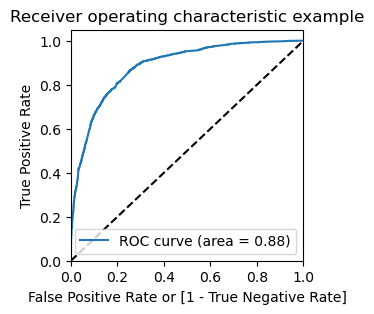

In [315]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [ ]:
#The area ROC Curve is 0.87 which is considerable value

In [208]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.647883,1,1,1,1,1,1,1,1,0,0,0
1,0,0.133180,0,1,1,0,0,0,0,0,0,0,0
2,0,0.232946,0,1,1,1,0,0,0,0,0,0,0
3,0,0.133180,0,1,1,0,0,0,0,0,0,0,0
4,0,0.495090,0,1,1,1,1,1,0,0,0,0,0


In [209]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accuracy and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.386711,1.000000,0.000000
0.1,0.1,0.577232,0.983306,0.321181
0.2,0.2,0.758306,0.912866,0.660847
0.3,0.3,0.788852,0.872557,0.736072
0.4,0.4,0.809321,0.765879,0.836714
0.5,0.5,0.810266,0.695847,0.882413
0.6,0.6,0.802708,0.627850,0.912965
0.7,0.7,0.773579,0.504072,0.943517
0.8,0.8,0.753582,0.413681,0.967908
0.9,0.9,0.706660,0.260179,0.988190


<Figure size 200x200 with 0 Axes>

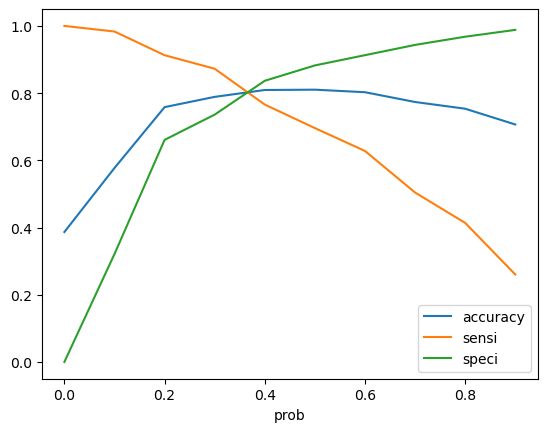

In [317]:
# Plotting it
plt.figure(figsize=(2, 2))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [ ]:
#The accuracy cut off is at 0.36 optimally

In [212]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.647883,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.133180,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.232946,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.133180,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.495090,0,1,1,1,1,1,0,0,0,0,0,1


In [213]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8031806014800819

In [214]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3127,  768],
       [ 482, 1974]], dtype=int64)

In [215]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [216]:
# Calculating the sensitivity
TP/(TP+FN)

0.8037459283387622

In [217]:
# Calculating the specificity
TN/(TN+FP)

0.8028241335044929

In [ ]:
#With the optimum cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%.

# 8. Prediction on Test set

In [218]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [219]:
# Substituting all the columns in the final train model
col = X_train.columns

In [236]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm_numeric = sm.add_constant(X_test[col])
X_test_sm_numeric
X_test_sm_numeric

,const,TotalVisits,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_olark chat,Lead Source_welingak website,Do Not Email_yes,Last Activity_olark chat conversation,Last Activity_sms sent,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,Last Notable Activity_unreachable
8308,1.0,0.035461,0.416813,False,False,False,False,False,False,False,False,True,False,False
7212,1.0,0.028369,0.001320,False,False,False,False,False,True,False,False,False,True,False
2085,1.0,0.000000,0.000000,True,False,True,False,False,False,False,False,True,False,False
4048,1.0,0.028369,0.617077,False,False,False,False,False,True,False,False,True,False,False
4790,1.0,0.028369,0.005282,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,1.0,0.000000,0.000000,False,True,False,False,True,False,False,False,True,False,False
8179,1.0,0.170213,0.148768,False,False,False,False,False,True,False,False,False,False,False
6236,1.0,0.000000,0.000000,False,True,False,False,False,False,False,False,False,False,False
5240,1.0,0.078014,0.458627,False,False,False,False,False,True,False,False,True,False,False


In [237]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm_numeric)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0.0 : 'Conversion_Prob'})
y_pred_final.head()

TypeError: loop of ufunc does not support argument 0 of type float which has no callable exp method

In [245]:
print(X_train.dtypes)
print(X_train.isnull().sum())
print(X_test.dtypes)
print(X_test.isnull().sum())

TotalVisits                                             float64
Total Time Spent on Website                             float64
Lead Origin_lead add form                                  bool
Lead Source_olark chat                                     bool
Lead Source_welingak website                               bool
Do Not Email_yes                                           bool
Last Activity_olark chat conversation                      bool
Last Activity_sms sent                                     bool
What is your current occupation_other                      bool
What is your current occupation_student                    bool
What is your current occupation_unemployed                 bool
What is your current occupation_working professional       bool
Last Notable Activity_unreachable                          bool
dtype: object
TotalVisits                                             0
Total Time Spent on Website                             0
Lead Origin_lead add form             

In [246]:
# Check and align the columns in X_test with X_train
missing_columns = set(X_train.columns) - set(X_test.columns)
for column in missing_columns:
    X_test[column] = 0

# Select the columns in X_train for X_test as well
X_test = X_test[X_train.columns]

# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)


In [235]:
import pandas as pd  
import numpy as np  
  
# Verify the number of features in the test set  
if X_test_sm_numeric.shape[1] != res.params.shape[0]:  
    raise ValueError("Number of features in X_test_sm_numeric does not match the number of coefficients in the model.")  
  
# Verify the column names in the test set  
if not all(X_test_sm_numeric.columns == X_train_sm.columns):  
    raise ValueError("Column names in X_test_sm_numeric do not match the column names in the training set.")  
  
# Storing prediction of test set in the variable 'y_test_pred'  
y_test_pred = res.predict(X_test_sm_numeric)  
  
# Converting it to a DataFrame  
y_pred_df = pd.DataFrame(y_test_pred)  
  
# Converting y_test to a DataFrame  
y_test_df = pd.DataFrame(y_test)  
  
# Remove index for both dataframes to append them side by side  
y_pred_df.reset_index(drop=True, inplace=True)  
y_test_df.reset_index(drop=True, inplace=True)  
  
# Append y_test_df and y_pred_df  
y_pred_final = pd.concat([y_test_df, y_pred_df], axis=1)  
  
# Renaming column  
y_pred_final = y_pred_final.rename(columns={0: 'Conversion_Prob'})  
  
# Display the first few rows of y_pred_final  
y_pred_final.head()

TypeError: loop of ufunc does not support argument 0 of type float which has no callable exp method

In [239]:
import pandas as pd  
import numpy as np  
  

  
# Add a constant to X_test  
X_test_sm = sm.add_constant(X_test)  
  
# Storing prediction of test set in the variable 'y_test_pred'  
y_test_pred = res.predict(X_test_sm)  
  
# Converting it to a DataFrame  
y_pred_df = pd.DataFrame(y_test_pred)  
  
# Converting y_test to a DataFrame  
y_test_df = pd.DataFrame(y_test)  
  
# Remove index for both dataframes to append them side by side  
y_pred_df.reset_index(drop=True, inplace=True)  
y_test_df.reset_index(drop=True, inplace=True)  
  
# Append y_test_df and y_pred_df  
y_pred_final = pd.concat([y_test_df, y_pred_df], axis=1)  
  
# Renaming column  
y_pred_final = y_pred_final.rename(columns={0: 'Conversion_Prob'})  
  
# Display the first few rows of y_pred_final  
y_pred_final.head()

TypeError: loop of ufunc does not support argument 0 of type float which has no callable exp method

In [241]:
import pandas as pd  
import numpy as np  
  
# Scaling numeric values  
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])  
  
# Check and align the columns in X_test with X_train  
missing_columns = set(X_train.columns) - set(X_test.columns)  
for column in missing_columns:  
    X_test[column] = 0  
  
# Select the columns in X_train for X_test as well  
X_test = X_test[X_train.columns]  
  
# Add a constant to X_test  
X_test_sm = sm.add_constant(X_test)  
  
# Storing prediction of test set in the variable 'y_test_pred'  
try:  
    y_test_pred = res.predict(X_test_sm)  
except AttributeError as e:  
    print("Error: ", str(e))  
    print("Please check if the model object 'res' has been properly initialized and trained.")  
    exit()  
  
# Converting it to a DataFrame  
y_pred_df = pd.DataFrame(y_test_pred)  
  
# Converting y_test to a DataFrame  
y_test_df = pd.DataFrame(y_test)  
  
# Remove index for both dataframes to append them side by side  
y_pred_df.reset_index(drop=True, inplace=True)  
y_test_df.reset_index(drop=True, inplace=True)  
  
# Append y_test_df and y_pred_df  
y_pred_final = pd.concat([y_test_df, y_pred_df], axis=1)  
  
# Renaming column  
y_pred_final = y_pred_final.rename(columns={0: 'Conversion_Prob'})  
  
# Display the first few rows of y_pred_final  
y_pred_final.head()

KeyError: "['Page Views Per Visit'] not in index"

In [244]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm_numeric)

TypeError: loop of ufunc does not support argument 0 of type float which has no callable exp method